PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

#INTRODUCCIÓN

Esta es la primera práctica del primer laboratorio. Dada una base de datos en formato .csv, se nos pide contestar a una serie de cuestiones. Para ello, lo primero que debemos hacer es cargar y leer la base de datos:

In [75]:
#importamos la base de datos
import pandas as pd #pandas
df=pd.read_csv('airbnb.csv',encoding='latin-1')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Se observa que se ha cargado de manera correcta. 

Importamos así también todas las librerías necesarias para ejecutar esta práctica. 

In [76]:
#importamos todas las librerías necesarias: 
import sklearn #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
import numpy as np #NumPy

Según se ha estudiado en clase, encontramos dos métodos para afrontarlo. Nos decantaremos por CRISP-DM. Las siglas para: CRoss-Industry Standard Process for Data Mining. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado. Los seis pasos que componen Crisp-DM son los siguientes:

- Comprensión de los negocios y definición del problema: comprender la naturaleza del problema y los objetivos de negocio.

- Comprensión de los datos: recopilación inicial, descripción y exploración  de datos.

- Preparación de los datos: Selección, limpieza, construcción, integración, formateo de los datos.

- Modelado: aplicar las técnicas de minería de datos a los dataset.

- Evaluación: determinar si los resultados son útiles a las necesidades del negocio.

- Despliegue: explotar utilidad de los modelos, integrándolos en las tareas de toma de decisiones de la organización -> Call to Action. 


#EJERCICIO 1

## Comprensión del negocio y definición del problema

El barrio de Williamsburg es uno de los barrios de moda hoy en día. Desde 2005 ha pasado de ser un distrito donde principalmente se encontraban fabricas a acoger una gran cantidad de gente joven y nuevos negocios. ¿Teniendo en cuenta los datos proporcionados que posición en términos de popularidad/calidad se puede decir que ostenta el barrio con respecto a los demás que forma New York?

Para medir la popularidad/calidad del barrio, tendremos primero en cuenta el número de apartamentos de calidad según los usuarios. Para ello, lo primero será clasificar los apartamentos como “Muy Malos”, “Malos”, “Regulares”, “Buenos” y “Muy Buenos”. Para ello primero haremos un par de transformaciones de los datos. La columna de reseñas por mes, se dividirán en 3 rangos iguales, después dependiendo del valor concreto que tenga cada apartamento se le asignarán las etiquetas: “Baja”, “Media” y ”Alta”. Para la columna que indica el número de días que está disponible asignaremos las etiquetas de menor valor a mayor de la siguiente manera: “Poco disponible”, “Disponible normalmente” y “Altamente disponible”. Finalmente crearemos una columna para clasificar los apartamentos, teniendo en cuenta una serie de reglas, que se explicarán más adelante. 

## Comprensión de los datos

La base de datos que utilizaremos consta de 48895 observaciones. En cada observación recopilamos los siguientes atributos: 
- id: id del apartamento en cuestión. 
- name: nombre del apartamento
- host_id: id del anfitrión 
- host_name: nombre del anfitrión 
- neighbourhood_group: estado al que pertenece
- neighbourhood: barrio al que pertenece 
- latitude: coordenadas de latitud
- longitude: coordenadas de longitud 
- room_type: tipo de habitación 
- price: precio en dólares
- minimum_nights: noches mínimas que te puedes hospedar
- number_of_reviews: número de reseñas 
- last_review: última reseña 
- reviews_per_month: reseñas por mes
- calculated_host_listings_count: ??? 
- availability_365: días disponibles por año. 


TENEMOS QUE ESTUDIAR ESTO: datos redundantes o anómalos.

## Preparación de los datos

Primero debemos tratar la base de datos para así estudiar qué hacer con los datos NaN que encontraremos. 

Analizamos cuántos datos NaN hay en la columna 'reviews_per_month', ya que la trataremos posteriormente, y deberemos conocer el contenido de esta. 


In [77]:
reviews_per_month_nan = df['reviews_per_month'].isna().sum()
print(reviews_per_month_nan)

10052


Ahora bien, vemos que hay 10052 datos NaN en la columna. Observemos cuántos datos hay en total para barajar las distintas opciones de qué hacer con estos datos NaN. Si es poca cantidad comparado con la cantidad de observaciones en total, podremos eliminar directamente esas observaciones, sin embargo, si suponen gran cantidad, podríamos buscar otras opciones, como rellenar con la media para así no afectar al equilibrio del resto de datos. 

Es verdad que como hablamos de reseñas por mes, sería factible convertir esos NaN en 0, para que así a la hora de categorizar la columna, lo detecte como Bajo. 

¿Por qué rellenamos con 0's? Encontramos un NaN en la columna de 'reviews_per_month', cuando en la columna de 'number_of_reviews' aparece un 0, o un NaN directamente, es decir, que anteriormente no se ha hecho ninguna reseña, por lo que obviamente, en el último mes, tampoco. No deberíamos rellenar con la media, ya que ahí estamos aportando una cierta cantidad de reseñas que no se han hecho. 

In [78]:
num_observations = df.shape[0]
print(num_observations)

48895


Supone un 20% de los datos totales. No resulta útil borrarlos, si no que deberíamos rellenar con 0 como hemos explicado anteriormente. 

In [79]:
df['reviews_per_month'].fillna(0, inplace=True)

Comprobamos por tanto que en esa columna ya no nos quede ningún NaN

In [80]:
reviews_per_month_nan = df['reviews_per_month'].isna().sum()
print(reviews_per_month_nan)

0


Def: review_per_month

Ahora debemos estudiar la distribución de esta, para ello haremos uso de boxplot, representando así cada apartamento para ver si hay outliers o datos rebundantes. 

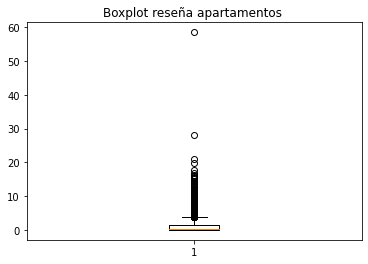

In [81]:
import matplotlib.pyplot as plt
boxplot_reviews=df['reviews_per_month']
plt.boxplot(boxplot_reviews)
plt.title('Boxplot reseña apartamentos ')
plt.show()

In [82]:
from matplotlib.cbook import boxplot_stats 
stats = boxplot_stats(boxplot_reviews)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))
            

-2.27 3.89 3312


Con esta información interpretamos que tenemos 3312 outliers, y que de valor máximo aceptado, se obtendrá 3,89, y mínimo lo interpretamos como 0, ya que no vamos a encontrar valores negativos en el número de reseñas por mes. 


Ya nos hemos asegurado que no nos quedad ningún dato NaN, así no encontraremos ningún error a la hora de categorizar la columna, que es el siguiente paso. 

Lo categorizamos en tres: Baja, Media y Alta. 

Considerando que según los rangos intercuartiles hemos obtenido que el máximo valor que se considera aceptable es 3,89, y que el outlier mayor que se puede conseguir es 60, no podemos hacer los rangos teniendo en cuenta el mayor que se pueda tomar, si no el mayor aceptado. Es por ello que para definir cada uno,tendremos en cuenta el rango intercuartilíco: [0-3.89] 

Por lo que: 
- [0-1.3) = 'Baja'
- [1.3 - 2.6) = 'Media'
- [2.6 - 60) = 'Alta' (si no encontrásemos outliers, terminaría en 3.89, pero lo que vamos a hacer es simplemente ignorar esos outliers)

In [83]:
filas=len(df.axes[0])
df.loc[:,'reviews_per_month_cat']=np.nan
for i in range(filas):
  if df['reviews_per_month'][i]<1.3: 
    df['reviews_per_month_cat'][i]='Baja'
  elif (df['reviews_per_month'][i]>1.3) & (df['reviews_per_month'][i]<=2.6): 
    df['reviews_per_month_cat'][i]='Media'
  else:
    df['reviews_per_month_cat'][i]='Alta'

df.head()

<ipython-input-83-32e49cfa6a12>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_per_month_cat'][i]='Baja'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_cat
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Baja
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Baja
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,Baja
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Alta
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Baja


Comprobamos si se ha ejecutado bien: 

In [84]:
reviews_per_month_cat_nan = df['reviews_per_month_cat'].isna().sum()
print(reviews_per_month_cat_nan)

0


Efectivamente. 

In [85]:
# Número de intervalos
#num_intervalos = 3

# Lista de intervalos
#intervalos = np.linspace(df['reviews_per_month'].min()-0.001, df['reviews_per_month'].max(), num_intervalos+1)

# Creamos las etiquetas 
#etiquetas = ['Baja', 'Media', 'Alta']

# Asigna una categoría a cada intervalo
#df['reviews_per_month'] = pd.cut(df['reviews_per_month'], intervalos, labels=etiquetas)

Por otro lado, vamos a clasificar los alquileres en función de los días que están disponibles. 

Para ello, siguiendo el patrón anterior, calculamos si hay NaN en la columna correspondiente: 


In [86]:
disponibilidad_nan = df['availability_365'].isna().sum()
print(disponibilidad_nan)

0


No hay ningún NaN en dicha columna, por lo que no hace falta tratarlos. En el caso de encontrarlos, se tendría que estudiar qué hacer con este conjunto de datos de manera independiente. 

Calculemos los intervalos de los rangos. 

In [87]:
df.loc[:,'availability_365_range']=np.nan

In [88]:
#Definimos los intervalos
n_inter = 3

# Creamos una lista de intervalos
interv = np.linspace(df['availability_365'].min()-0.001, df['availability_365'].max(), n_inter+1)

# Creamos las etiquetas 
labels = ['Poco disponible', 'Disponible normalmente', 'Altamente disponible']

# Asigna una categoría a cada intervalo
df['availability_365_range'] = pd.cut(df['availability_365'], interv, labels=labels)

Imprimimos 5 observaciones del nuevo atributo categorizado para observar si se ha realizado de manera correcta. 

In [89]:
print(df['availability_365_range'].head())

0      Altamente disponible
1      Altamente disponible
2      Altamente disponible
3    Disponible normalmente
4           Poco disponible
Name: availability_365_range, dtype: category
Categories (3, object): ['Poco disponible' < 'Disponible normalmente' < 'Altamente disponible']


Finalmente, añadimos la nueva columna de clasificación, y la rellenamos con datos NaN, para así más adelante rellenarlo según las reglas definidas en el enunciado.

In [90]:
df.loc[:,'classification']=np.nan

Imprimimos las 5 primeras observaciones con cada atributo para comprobar que se ha añadidio de manera correcta

In [91]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_cat,availability_365_range,classification
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Baja,Altamente disponible,NaN
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Baja,Altamente disponible,NaN
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,Baja,Altamente disponible,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Alta,Disponible normalmente,NaN
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Baja,Poco disponible,NaN


Vamos a clasificar los datos según la siguente tabla

 Poco disponible | Disponible normalmente | Altamente disponible
-----:|:--------:| -------
Bueno | Regular | Malo
Bueno | Regular | Malo
Muy bueno | Bueno | Muy Malo



Donde cada fila depende del valor de la reseña en Baja, Media y Alta respectivamente

In [92]:

filas=len(df.axes[0])
for i in range (filas):
  if df['availability_365_range'][i]=='Poco disponible':
    if df['reviews_per_month_cat'][i]=='Alta':
      df['classification'][i]='Muy bueno'
    else:
      df['classification'][i]='Bueno'
  elif df['availability_365_range'][i]=='Disponible normalmente':
    if df['reviews_per_month_cat'][i]=='Alta':
      df['classification'][i]='Bueno'
    else:
      df['classification'][i]='Regular'
  else:
    if df['reviews_per_month_cat'][i]=='Alta':
      df['classification'][i]='Muy malo'
    else:
      df['classification'][i]='Malo'


<ipython-input-92-6bf71fe99177>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classification'][i]='Malo'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Comprobemos que no quede ningun NaN. 

In [93]:
classif_nan = df['classification'].isna().sum()
print(classif_nan)

0


Todos los datos de la nueva columna han sido modificados, por lo que ya tenemos clasificados los alquieleres. 

Estudiaremos cuantos apartamentos pertenecen a cada clase. 



In [94]:
cant_bueno = df['classification'].value_counts() 
print(cant_bueno)


Bueno        29017
Malo          9451
Regular       4956
Muy bueno     3447
Muy malo      2024
Name: classification, dtype: int64


Hay un total de 30 637 alquileres buenos, 11 474 malos y solamente 1 muy malo, por lo que podemos considerar que de los alquileres en esta página predominan los buenos. 

## Modelado


Una vez hemos preparado los datos tal y como deseamos, procedemos a modelar y estudiar el objetivo. Vamos a ver cuántos barrios hay, y cuántos apartamentos encontramos en los más populares. 

In [95]:
df['neighbourhood'].value_counts()


Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

Primero observamos que Williamsburg es donde más apartamentos encontramos.


Como el objetivo del ejercicio es obtener la popularidad/calidad de cada barrio, para así ordenarlos y averiguar en qué ranking se encuentra, debemos por tanto hacer la media de cada uno. 

Anteriormente los clasificamos en unos rangos, pero eso no es efectivo, volveremos a clasificarlos en una nueva columna llamada 'classification_num', que se regirá a partir de las nuevas reglas proporcionadas, pero con un ligero cambio, y es que cada rango va a pasar a obtener un valor, tal que así: 
- muy malo: 0
- malo: 0.25
- regular: 0.5 
- bueno: 0.75 
- muy bueno: 1 

Al igual que se ha ejecutado anteriormente, creamos una nueva variable, y lo añadimos como columna a nuestra base de datos. 

In [96]:
df.loc[:,'classification_num']=np.nan

Comprobamos de que se haya añadido correctamente. 

In [97]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_cat,availability_365_range,classification,classification_num
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Baja,Altamente disponible,Malo,NaN
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Baja,Altamente disponible,Malo,NaN
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,Baja,Altamente disponible,Malo,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Alta,Disponible normalmente,Bueno,NaN
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Baja,Poco disponible,Bueno,NaN


Procedemos a la clasificación de cada apartameto, tal y como se explicó anteriormente. 

In [98]:
filas=len(df.axes[0])
for i in range (filas):
  if df['availability_365_range'][i]=='Poco disponible':
    if df['reviews_per_month_cat'][i]=='Alta':
      df['classification_num'][i]=1
    else:
      df['classification_num'][i]=0.75
  elif df['availability_365_range'][i]=='Disponible normalmente':
    if df['reviews_per_month_cat'][i]=='Alta':
      df['classification_num'][i]=0.75
    else:
      df['classification_num'][i]=0.5
  else:
    if df['reviews_per_month_cat'][i]=='Alta':
      df['classification_num'][i]=0
    else:
      df['classification_num'][i]=0.25

<ipython-input-98-06fd58d22def>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classification_num'][i]=0.25
<ipython-input-98-06fd58d22def>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classification_num'][i]=0.75
<ipython-input-98-06fd58d22def>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classification_num'][i]=0.75
<ipython-input-98-06fd58d22def>:12: SettingWithCopyWarning: 
A value is trying to be set on a c

A priori, parece que los valores se han añadido correctamente, pero lo comprobaremos estudiando a ver si hay algún NaN (que no debería).

In [99]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_cat,availability_365_range,classification,classification_num
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Baja,Altamente disponible,Malo,0.25
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Baja,Altamente disponible,Malo,0.25
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,Baja,Altamente disponible,Malo,0.25
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Alta,Disponible normalmente,Bueno,0.75
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Baja,Poco disponible,Bueno,0.75


In [100]:
classif_num_nan = df['classification_num'].isna().sum()
print(classif_num_nan)

0


Obtenemos el valor deseado. Ahora, gracias a la función '.value_counts', compararemos las dos columnas 'classification' y 'classification_num', ya que deberán tener el mismo número de apartamentos en cada rango o valor corresponidentemente. 

In [101]:
df['classification'].value_counts()

Bueno        29017
Malo          9451
Regular       4956
Muy bueno     3447
Muy malo      2024
Name: classification, dtype: int64

In [102]:
df['classification_num'].value_counts()

0.75    29017
0.25     9451
0.50     4956
1.00     3447
0.00     2024
Name: classification_num, dtype: int64

Lo que deseábamos se ha ejecutado correctamente. 

Para proceder con el estudio de las clasificaciones medias de cada barrio, crearemos un nuevo vector llamado barrios en el cual se guardará cada barrio sin repetición, y otra variables num_barrios, que será la longitud de este último. 

In [103]:
barrios= np.unique(df['neighbourhood'])
num_barrios = len(barrios)
print('Number of classes:', num_barrios)

Number of classes: 221


Tenemos 221 barrios distintos. 

ESTO LO TENDRÍAMOS QUE PONER EN EL SEGUNDO APARTADO, NO? 

In [104]:
neighbourhood_nan = df['neighbourhood'].isna().sum()
print(neighbourhood_nan)

0


In [105]:
barrios

array(['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', 'Astoria',
       'Bath Beach', 'Battery Park City', 'Bay Ridge', 'Bay Terrace',
       'Bay Terrace, Staten Island', 'Baychester', 'Bayside', 'Bayswater',
       'Bedford-Stuyvesant', 'Belle Harbor', 'Bellerose', 'Belmont',
       'Bensonhurst', 'Bergen Beach', 'Boerum Hill', 'Borough Park',
       'Breezy Point', 'Briarwood', 'Brighton Beach', 'Bronxdale',
       'Brooklyn Heights', 'Brownsville', "Bull's Head", 'Bushwick',
       'Cambria Heights', 'Canarsie', 'Carroll Gardens', 'Castle Hill',
       'Castleton Corners', 'Chelsea', 'Chinatown', 'City Island',
       'Civic Center', 'Claremont Village', 'Clason Point', 'Clifton',
       'Clinton Hill', 'Co-op City', 'Cobble Hill', 'College Point',
       'Columbia St', 'Concord', 'Concourse', 'Concourse Village',
       'Coney Island', 'Corona', 'Crown Heights', 'Cypress Hills',
       'DUMBO', 'Ditmars Steinway', 'Dongan Hills', 'Douglaston',
       'Downtown Brooklyn', 'Dyk

Creamos una nueva variable vector que se llame classification_barrios, la cual será de la misma longitud que el vector barrios definido anteriormente. Esta guardará las clasificaciones. 

In [106]:
classification_barrios=np.array(np.zeros(num_barrios))

Gracias al uso de dos bucles, guardaremos por cada barrio la suma de clasificación de cada apartamento, para así más adelante dividir entre el total de apartamentos(n), para calcular la media. 

In [107]:
for i in range(len(barrios)):
  for j in range(filas):
    if barrios[i]==df['neighbourhood'][j]:
      classification_barrios[i]=classification_barrios[i]+df['classification_num'][j]


In [108]:
n=np.array(np.zeros(num_barrios))
for i in range(len(barrios)):
  for j in range(filas):
    if barrios[i]==df['neighbourhood'][j]:
      n[i]=n[i]+1


Calculamos la media: 

In [109]:
total=classification_barrios/n
#ordenado=total
#ordenado=sorted(ordenado,reverse=True)
#print(ordenado)

Unimos en una variable llamada matriz el vector de barrios, y la clasificación media de cada barrio.

In [110]:
matriz=np.append(barrios,total,axis=0)

In [111]:

ordenado=matriz.reshape(2,221)
ordenado=ordenado.transpose()


In [112]:
orden=sorted(ordenado, key=lambda x:x[1],reverse=True)

In [113]:
print(orden)

[array(['New Springville', 0.875], dtype=object), array(['Bay Terrace, Staten Island', 0.75], dtype=object), array(['New Dorp', 0.75], dtype=object), array(['Rossville', 0.75], dtype=object), array(['Woodrow', 0.75], dtype=object), array(['Downtown Brooklyn', 0.7319277108433735], dtype=object), array(['Morningside Heights', 0.7196531791907514], dtype=object), array(['Navy Yard', 0.7142857142857143], dtype=object), array(['Woodlawn', 0.7045454545454546], dtype=object), array(['Emerson Hill', 0.7], dtype=object), array(['Little Neck', 0.7], dtype=object), array(['Cobble Hill', 0.6944444444444444], dtype=object), array(['Two Bridges', 0.6909722222222222], dtype=object), array(['Columbia St', 0.6904761904761905], dtype=object), array(['Stuyvesant Town', 0.6891891891891891], dtype=object), array(["Prince's Bay", 0.6875], dtype=object), array(['Carroll Gardens', 0.6802575107296137], dtype=object), array(['Nolita', 0.6798418972332015], dtype=object), array(['Brooklyn Heights', 0.6785714285714

In [114]:
pos=0
for i in range (len(orden)):
  if orden[i][0]=='Williamsburg':
    pos=i;
pos

23

Podemos concluir que el Barrio está en la posición 19 mejor valorado respecto a los 221 barrios. 

##Evaluación


##Despliegue

#EJERCICIO 2

 Explica visualmente como se distribuyen los 5 barrios más populares (esto serán aquellos cuyos apartamentos estén más solicitados en números absolutos. Para ello utiliza un diagrama de burbuja donde el eje de las X indica el barrio y el eje Y la calidad de los apartamentos. Usa todos los diagramas que necesites para llegar a esta conclusión final.

Creamos un vector llamado 'top', en el cual, guardaremos los top 5 barrios más populares, según los apartamentos más solicitados. 
Para ello seguiremos el proceso que hicimos en el ejercicio anterior. Utilizaremos el vector barrios ya utilizado, y lo uniremos en otra variable junto a la variable 'availability_365' que nos proporciona la base de datos. 

'availability_365' se estudió en el ejercicio anterior, y se llegó a la conclusión de que no tenía ningún valor NaN, por lo que ahora, calcularemos por barrio la media de disponibi

In [115]:
 disponibilidad_barrios=np.array(np.zeros(num_barrios))

In [116]:
filas=len(df.axes[0])
d=np.array(np.zeros(num_barrios))
for i in range(len(barrios)):
  for j in range(filas):
    if barrios[i]==df['neighbourhood'][j]:
      disponibilidad_barrios[i]=disponibilidad_barrios[i]+df['availability_365'][j]
      d[i]=d[i]+1


In [117]:
disponibilidad_barrios=disponibilidad_barrios/d
disponibilidad_barrios[1]

94.25

In [118]:
disponibilidad_barrios[4]

109.19111111111111

In [119]:
max(disponibilidad_barrios)


TypeError: ignored

Por lo que ahora encontramos que tenemos: 
- disponibilidad_barrios: la media de disponibilidad por barrios 
- barrios: cada barrio sin repeticiones. 

Ahora, tal y como hicimos en el ejercicio anterior, deseamos unirlos, para así ordenarlos de mayor a menor, y tener constancia de los barrios ordenados. 

In [120]:
dis=np.append(barrios,disponibilidad_barrios,axis=0) 

In [121]:
dis_ordenado=dis.reshape(2,221)
dis_ordenado=dis_ordenado.transpose()

In [122]:
dis_orden=sorted(dis_ordenado, key=lambda x:x[1])

In [123]:
print(dis_orden)

[array(['Bay Terrace, Staten Island', 0.0], dtype=object), array(['New Dorp', 0.0], dtype=object), array(['Woodrow', 0.0], dtype=object), array(['Downtown Brooklyn', 39.48192771084337], dtype=object), array(['Morningside Heights', 43.054913294797686], dtype=object), array(['Navy Yard', 48.92857142857143], dtype=object), array(['Rossville', 59.0], dtype=object), array(['Cobble Hill', 63.21212121212121], dtype=object), array(['Stuyvesant Town', 65.10810810810811], dtype=object), array(['New Springville', 65.25], dtype=object), array(['Sea Gate', 65.57142857142857], dtype=object), array(['Brooklyn Heights', 66.03896103896103], dtype=object), array(['Civic Center', 68.26923076923077], dtype=object), array(['Columbia St', 69.0952380952381], dtype=object), array(['Nolita', 69.81027667984189], dtype=object), array(['Carroll Gardens', 71.6695278969957], dtype=object), array(['Roosevelt Island', 72.58441558441558], dtype=object), array(['East Village', 74.62385321100918], dtype=object), array([

Por lo que en 'dis_orden' encontramos ordenado de mayor a menor, cada barrio con su disponibilidad de media correspondiente. 

Tomaremos los 5 mayores, y los representaremos en un mediante un diagrama burbuja. 

- x_barrios: los 5 barrios más populares en términos de disponibilidad
- y_barrios: la calidad de los apartamentos de cada barrio correspondiente. 
- s_barrios: disponibilidad de los apartamentos de cada barrio correspondiente. 

Comencemos por la variable x_barrios: 

In [124]:
x_barrios = [row[0] for row in dis_orden[:5]]
print("Los primeros 5 barrios son:", x_barrios)

Los primeros 5 barrios son: ['Bay Terrace, Staten Island', 'New Dorp', 'Woodrow', 'Downtown Brooklyn', 'Morningside Heights']


Continuamos con la variable y_barrios: 

In [125]:
#definimos y_barrios de tamaño igual a la suma de los apartamentos de cada x_barrio: 
filas=len(df.axes[0])
tamano_y_barrios=0
for i in range(len(x_barrios)):
  for j in range(filas):
    if df['neighbourhood'][j]==x_barrios[i]:
      tamano_y_barrios=tamano_y_barrios+1

tamano_y_barrios

433

Estudiaremos el caso por tanto de 433 apartamentos, es decir, la suma total de apartamentos en los siguientes barrios: 'Bay Terrace, Staten Island', 'New Dorp', 'Woodrow', 'Downtown Brooklyn', 'Morningside Heights' es de 433.

In [ ]:
#filas=len(df.axes[0])
#y_barrios=np.array(np.zeros(tamano_y_barrios))
#for i in range(filas): 
#  for j in range(len(x_barrios)): 
#    for k in range(len(y_barrios)):
#      if df['neighbourhood'][i]==x_barrios[j]:
#        y_barrios[k]=df.iloc[i]

In [126]:
y_barrios=np.array(np.zeros(tamano_y_barrios))

In [134]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_cat,availability_365_range,classification,classification_num
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Baja,Altamente disponible,Malo,0.25
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Baja,Altamente disponible,Malo,0.25
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,Baja,Altamente disponible,Malo,0.25
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Alta,Disponible normalmente,Bueno,0.75
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Baja,Poco disponible,Bueno,0.75


In [ ]:
filas=len(df.axes[0])
y_barrios=np.array(np.zeros(tamano_y_barrios))
for i in range(len(x_barrios)):
  for j in range(filas):
    for k in range(len(y_barrios)):
      if df['neighbourhood'][j]==x_barrios[i]:
        y_barrios[k]=df['classification_num'][j] #claro pero yo le debería de estar metiendo 'classification' lo está agregando mal 

In [259]:
y_barrios

0.75

me parece un poco raro eso, voy a ver cuántos apartamentos me imprime.

In [254]:
filas=len(df.axes[0])
tamano_y_barrios=0
for i in range(len(x_barrios)):
  for j in range(filas):
    if df['neighbourhood'][j]==x_barrios[i]:
      print(df['classification'][j])

Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Malo
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Regular
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Regular
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Regular
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Malo
Bueno
Bueno
Bueno
Bueno
Malo
Bueno
Bueno
Bueno
Bueno
Regular
Malo
Bueno
Bueno
Regular
Malo
Regular
Regular
Bueno
Malo
Regular
Malo
Bueno
Bueno
Bueno
Bueno
Regular
Bueno
Bueno
Malo
Malo
Malo
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Regular
Malo
Regular
Malo
Bueno
Malo
Bueno
Malo
Bueno
Malo
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Regular
Bueno
Bueno
Regular
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno
Bueno

In [ ]:
#Bubble Plot BARRIO1. The size of points changes based on a third variable
# x = barrio (ya tenemos una variable de los barrios)
# y = calidad de los apartamentos (classification)
# s = disponibilidad
plt.scatter(x_barrios[0],y_barrios,s_barrios)

#EJERCICIO 3

Una vez obtenida la información del apartado anterior, queremos tratar de entender las diferencias de precio entre alquilar un apartamento entero y una habitación privada. Usa los diagramas de cajas donde cada uno de los 5 barrios más populares está representado por una caja y haz una interpretación de los resultados.

#EJERCICIO 4

Por último, se intuye que la tendencia a dejar reseñas en las apps que prestan servicios, ha aumentado en los últimos años. Decide que diagrama es más útil para este caso. Dibújalo y realiza una interpretación del mismo. Tomaremos la fecha de la última reseña como el dato útil para realizar dicho caso.